<a href="https://colab.research.google.com/github/annissatessffaaye/QA-Data-Engineering-Bootcamp-Azure-Python-SQL/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Statistical Formulae
# Problem: 
# In any dataset-> values can be on different scales and units
# Name. Age. MoneyEarned BankBalance Married Happy 
# ABC.   number. number.   number.    boolean.  boolean 
# ML-> to either classify-> Married, Happy 
#.      regression -> Age, Money, BankBal.... 
# Let's assume-> Happiness (T/F)
# Happiness = f(Name, Age, MoneyEarned, BankBal, Married)
# how to find whether it should a function or not-> Independence, Correlation 
# Name-> string
# Age-> 0 to 200 
# Money-> 0 to GBP 1 Trillion 
# BankBal-> - 1 Trillion to 1 Trillion 
# Happiness = w1*Name + w2*Age + w3*ME + w4*BB + w5*married + bias
# all w and b-> variables, everything else (Name...Age..-> Constants)
# ML-> graph-> we will try to fit these equations -> weights and bias are components
      # along my x,y,z.... axis 
# deep learning-> Integration -> we assume values for W,b; differentiation-> reduce values 
# by a very tiny fraction 

In [ ]:
# d/f b/w the ranges of Age, Money and BankBal will ensure
# that Money and BankBal will always dominate the equation!
# why-> because they are very large numbers!

# wx*billion_dollars + wy*millions_bank + wz*42
# we want to avoid EXTREMELY LARGE or EXTREMELY SMALL VARIABLES!

# everything-> in the same scale! 



In [ ]:
# NORMALIZATION-> bringing your data to same scale (No large or no TINY values)
# our options:
# Type                                        Scale 
# MinMax                                      from 0 to 1
# we assume smallest value to be 0, largest to be 1, and all values are scaled b/w
#. example-> wherever negative numbers may not make sense->  Pixels, 
# colors, images, videos

# tanh-> -1 to 1
# TanH (sine=P/H, cosine=B/H)-> tangent -> sine and 90 degree delay-> cosine 
# tangent-> wave-> tangent-> Direction of the wave-> (y2-y1)/(x2-x1)-> slope
# slope-> is calculate on small data (linear or homogeneous)
# tangent is calulcated on big shapes (heterogeneous)

# Z-Score (Standard Scaler)                   -inf to +inf 
#    Make the average 0, and scale everything else as a RATIO instead of original
#.   number 
#.    from -inf to +inf -> we remove everything that is more than 3 times of 
#.    STANDARD DEVIATION!!
#.    Since Z-Score gives you ratios-> outliers can be removed by just removing
#.    all values > +3,  < -3 


In [ ]:
# Strings: use them for filtering-> One-Hot Encoding 
#        : use them as input variables-> Label Encoding (convert strings to numbers)

In [ ]:
# Sales.  ItemsSold.   Location.  If_to_fund_company
#. 100.     10.        London.     False
#. 1000.    900.       London.     False
#  100.     5.         York        True
#. 90       1          MiddleEarth. True 

# 1st situation where i want to build 1 ML model representing all cities:
# London-> 0, York-> 1 and ME-> 2
# w1*Sales + w2*IS + w3*Location 
# does this mean-> w3*0 for London, w3 for ME is twice as large
# as York?


In [ ]:
# One-Hot ENcoding
#String Data (few elements- discrete values)
# we convert these discrete values into independent columns

# Sales.  ItemsSold.   loc_london.  loc_york.  loc_ME  If_to_fund_company
#. 100.     10.        1             0         0     False
#. 1000.    900.       1             0         0     False
#  100.     5.         0             1         0     True
#. 90       1          0             0         1     True 

# Filter-> 3 ML models for this-> 1 for London, York and ME each

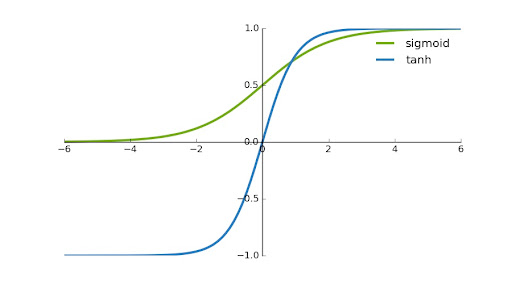

In [ ]:
# Sigmoid-> to scale b/w 0 to 1 (Probability)
# tanh-> to scale b/w -1 to 1 (Outlier managing, profit/loss)
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('sigmoid tanh.jpeg')
cv2_imshow(img)

In [ ]:
# Z-Score
# Making the average as 0, and scaling everything as a ratio of STANDARD_DEVIATIOn
# we assume a circle with radius as Standard Deviation, and the centre as Mean
# formulae: dataset_x -> z-score = (x-mean) / std
# z-score = (distance from centre)/radius 
# anything 3 times larger than radius is assumed to be outlier!

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/DFE3/main/data.csv', header=0)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# statistics of dataset
data.describe()
# STD and MEAN can be easily extracted from this dataset!

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
stats = data.describe().T
mu = stats['mean']
sigma = stats['std']
# calculated mean and standard_deviation for every column

In [ ]:
# Z-score--> x-mean/std
dataset_norm = (data-mu)/sigma

In [ ]:
dataset_norm.head(10)

,Unnamed: 32,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,concavity_se,concavity_worst,diagnosis,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst,id,perimeter_mean,perimeter_se,perimeter_worst,radius_mean,radius_se,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,NaN,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,0.723390,2.107672,NaN,2.253764,0.906286,1.935312,-0.236197,1.268817,2.830540,2.301575,1.096100,2.487545,1.885031,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098
1,NaN,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,-0.440393,-0.146620,NaN,-0.867889,-0.099356,0.280943,-0.236196,1.684473,0.263095,1.533776,1.828212,0.498816,1.804340,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879
2,NaN,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,0.212889,0.854222,NaN,-0.397658,0.293301,0.201214,0.431362,1.565126,0.850180,1.346291,1.578499,1.227596,1.510541,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953
3,NaN,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,0.818798,1.987839,NaN,4.906602,2.045711,4.930672,0.431741,-0.592166,0.286341,-0.249720,-0.768233,0.326087,-0.281217,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866
4,NaN,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,0.827742,0.612640,NaN,-0.561956,0.498889,-0.396751,0.431821,1.775011,1.272070,1.337363,1.748758,1.269426,1.297434,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481
5,NaN,-0.505206,-0.289004,-0.244105,1.243242,0.445152,1.720103,0.823931,-0.069063,0.905091,0.865540,0.159885,1.262133,NaN,1.888343,0.486418,2.239831,-0.236185,-0.386808,-0.321022,-0.114908,-0.475956,-0.254846,-0.165353,2.235455,0.156209,2.046712,1.004518,0.134001,1.752527,-0.834601,-0.592141,-0.313560
6,NaN,1.094332,0.298365,1.274098,0.088218,-0.650995,0.021196,0.646366,-0.227889,1.195664,0.299809,-0.309869,0.509104,NaN,-0.761662,-0.610680,-0.014718,-0.236181,1.137124,0.155274,1.367122,1.169878,0.149751,1.367780,-0.123028,-0.908231,0.518184,-0.064268,-0.828937,0.262245,0.160508,-0.804232,0.322599
7,NaN,-0.218772,0.233517,0.028834,1.139100,0.268696,0.724148,0.281702,0.434966,0.623647,0.060972,-0.232350,-0.021035,NaN,1.658894,0.611131,1.724917,0.432620,-0.072803,0.489620,0.099361,-0.118413,0.643057,0.163619,1.602639,0.587514,1.446688,1.402121,-0.687399,0.477221,0.358135,0.290306,0.400695
8,NaN,-0.383870,-0.352093,-0.248145,1.682529,0.532821,1.816711,1.149680,0.075177,1.390393,1.218025,0.120462,1.278909,NaN,1.571079,-0.017348,1.287517,-0.236176,-0.183919,-0.227543,-0.031581,-0.319885,-0.356536,-0.161215,2.199903,-0.436293,1.661295,1.963872,0.107387,2.387756,0.588312,-0.389475,0.822090
9,NaN,-0.508616,-0.360447,-0.297148,2.561105,2.607292,5.108382,0.940932,0.409035,1.618591,1.737343,1.508520,3.991920,NaN,2.780649,2.375256,6.840837,0.432962,-0.329192,-0.409060,-0.286026,-0.473118,-0.387909,-0.243975,1.581308,0.035977,2.318256,0.796597,-0.320854,2.368360,1.104467,0.692736,2.440961


In [ ]:
import numpy as np
mydataset =  np.array([1,4,6,42,1042,99,24, 101])
minv = mydataset.min()
maxv = mydataset.max()
norm_dataset = (mydataset - minv)/(maxv-minv)
# formulae-> dataset x -> minmax -> (x-min)/(max-min)

In [ ]:
norm_dataset

array([0.        , 0.00288184, 0.00480307, 0.03938521, 1.        ,
       0.09414025, 0.02209414, 0.09606148])

In [ ]:
# Label Encoding
# converting words to numbers
# dictionary
mydictionary = { 'M': 1, 'B': 0}
mytfx = lambda val: mydictionary[val]

In [ ]:
data['encoded_diagnosis'] = data['diagnosis'].map(mytfx)

In [ ]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN,0
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN,0
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN,0
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN,1
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN,1
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN,0


In [ ]:
data2

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
# one hot encoding 
mydictionary1 = { 'M': 1, 'B': 0}
mytfx1 = lambda val: mydictionary1[val]
mydictionary2 = { 'M': 0, 'B': 1}
mytfx2 = lambda val: mydictionary2[val]

In [ ]:
data['diagnosis_M'] = data['diagnosis'].map(mytfx1)
data['diagnosis_B'] = data['diagnosis'].map(mytfx2)

In [ ]:
data.tail(10)
#One-Hot Encoding-> you now have 2 new columns in the end!


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis,diagnosis_M,diagnosis_B
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN,0,0,1
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN,0,0,1
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN,0,0,1
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN,1,1,0
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN,1,1,0
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN,1,1,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN,1,1,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN,1,1,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN,1,1,0
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN,0,0,1


In [ ]:
# One-hot encoding is used as a filter-> to select only Malignant rows!
data_m = data[data['diagnosis_M'] == 1] 
print(len(data_m))
data_m.tail(10)

212


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis,diagnosis_M,diagnosis_B
521,91762702,M,24.63,21.60,165.50,1841.0,0.10300,0.2106,0.23100,0.14710,0.1991,0.06739,0.9915,0.9004,7.050,139.90,0.004989,0.03212,0.03571,0.01597,0.01879,0.004760,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671,NaN,1,1,0
533,91930402,M,20.47,20.67,134.70,1299.0,0.09156,0.1313,0.15230,0.10150,0.2166,0.05419,0.8336,1.7360,5.168,100.40,0.004938,0.03089,0.04093,0.01699,0.02816,0.002719,23.23,27.15,152.0,1645.0,0.1097,0.2534,0.3092,0.1613,0.3220,0.06386,NaN,1,1,0
535,919555,M,20.55,20.86,137.80,1308.0,0.10460,0.1739,0.20850,0.13220,0.2127,0.06251,0.6986,0.9901,4.706,87.78,0.004578,0.02616,0.04005,0.01421,0.01948,0.002689,24.30,25.48,160.2,1809.0,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569,NaN,1,1,0
536,91979701,M,14.27,22.55,93.77,629.8,0.10380,0.1154,0.14630,0.06139,0.1926,0.05982,0.2027,1.8510,1.895,18.54,0.006113,0.02583,0.04645,0.01276,0.01451,0.003756,15.29,34.27,104.3,728.3,0.1380,0.2733,0.4234,0.1362,0.2698,0.08351,NaN,1,1,0
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.2087,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.52,42.79,128.7,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090,NaN,1,1,0
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,NaN,1,1,0
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN,1,1,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN,1,1,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,NaN,1,1,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.2770,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400,NaN,1,1,0
